In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ViewingActivity.csv')

In [3]:
df.shape

(23043, 10)

In [5]:
df.head(1)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Kayla,2021-08-23 21:14:09,00:21:41,NaN,New Girl: Season 2: Table 34 (Episode 16),NaN,Apple Apple TV 4 Apple TV,00:21:43,00:21:43,CA (Canada)


In [6]:
df = df.drop(['Profile Name', 'Attributes', 'Supplemental Video Type', 'Device Type', 'Bookmark', 'Latest Bookmark', 'Country'], axis = 1)
df.head(1)

,Start Time,Duration,Title
0,2021-08-23 21:14:09,00:21:41,New Girl: Season 2: Table 34 (Episode 16)


In [10]:
df['Start Time'] = pd.to_datetime(df['Start Time'], utc = True)

In [11]:
df = df.set_index('Start Time')
df.index = df.index.tz_convert('US/Eastern')
df = df.reset_index()
df.head(1)

,Start Time,Duration,Title
0,2021-08-23 17:14:09-04:00,00:21:41,New Girl: Season 2: Table 34 (Episode 16)


In [12]:
df['Duration'] = pd.to_timedelta(df['Duration'])

In [30]:
office = df[df['Title'].str.contains('The Office (U.S.)', regex=False)]

In [21]:
office.shape

(2806, 3)

In [24]:
office = office[(office['Duration'] > '0 days 00:01:00')]
office.shape

(2603, 3)

In [31]:
office['Duration'].sum()

Timedelta('68 days 10:10:15')

In [34]:
office['weekday'] = office['Start Time'].dt.weekday
office['hour'] = office['Start Time'].dt.hour
office.head(1)

C:\Users\willi\AppData\Local\Temp/ipykernel_14796/3702097233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = office['Start Time'].dt.weekday
C:\Users\willi\AppData\Local\Temp/ipykernel_14796/3702097233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['hour'] = office['Start Time'].dt.hour


,Start Time,Duration,Title,weekday,hour
317,2021-06-27 19:13:44-04:00,0 days 00:00:10,The Office (U.S.): Season 1_hook_primary_16x9,6,19


In [35]:
%matplotlib inline
import matplotlib


C:\Users\willi\AppData\Local\Temp/ipykernel_14796/671850257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['weekday'] = pd.Categorical(office['weekday'], categories= [0,1,2,3,4,5,6], ordered=True)


<AxesSubplot:title={'center':'Office Episodes watched by day'}>

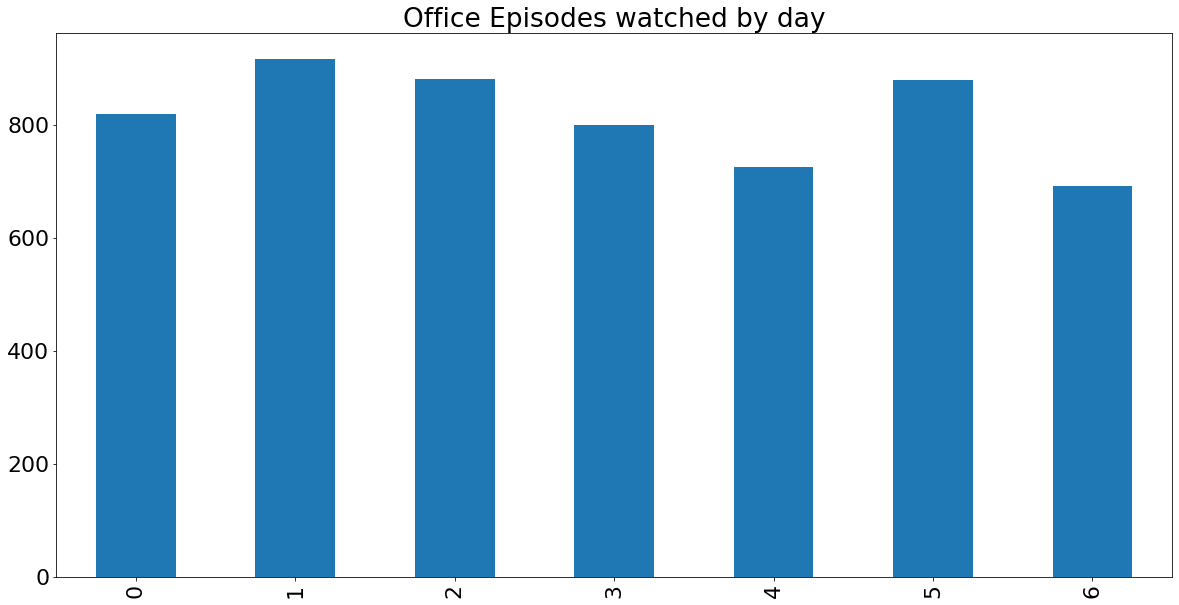

In [36]:
office['weekday'] = pd.Categorical(office['weekday'], categories= [0,1,2,3,4,5,6], ordered=True)
office_by_day = office['weekday'].value_counts()
office_by_day = office_by_day.sort_index()
matplotlib.rcParams.update({'font.size': 22})
office_by_day.plot(kind='bar',figsize=(20,10),title='Office Episodes watched by day')


C:\Users\willi\AppData\Local\Temp/ipykernel_14796/2563289678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  office['hour'] = pd.Categorical(office['hour'], categories=


<AxesSubplot:title={'center':'Office Episodes Watched by Hour'}>

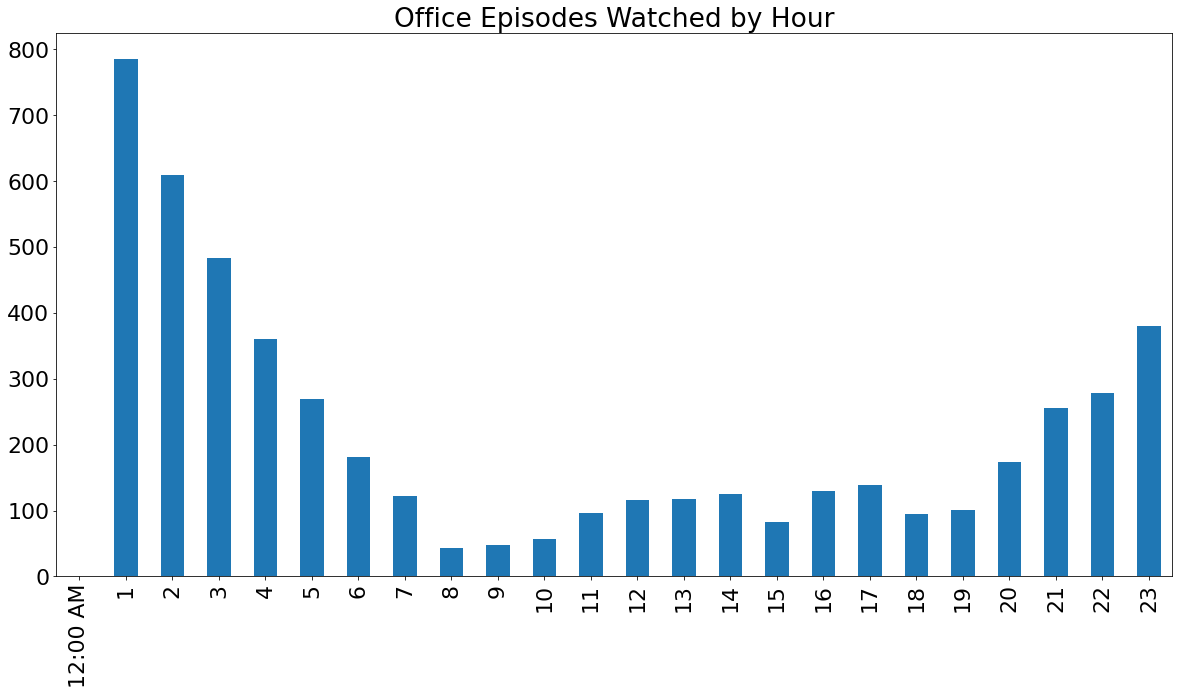

In [38]:
office['hour'] = pd.Categorical(office['hour'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

office_by_hour = office['hour'].value_counts()
office_by_hour = office_by_hour.sort_index()
office_by_hour.plot(kind='bar', figsize=(20,10), title='Office Episodes Watched by Hour')
